In [1]:
#1
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = load_diabetes()
# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data,
                           columns=diabetes.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes.target

print(diabetes_df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [2]:
diabetes_df.shape

(442, 11)

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [2]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [5]:
diabetes_df.duplicated().value_counts()
#No Duplicate rows


False    442
Name: count, dtype: int64

### The 10 features of the data set are of Float Data Type. There are no Missing values or duplicated rows in the data set

## 2.Exploratory Data Analysis 

In [6]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


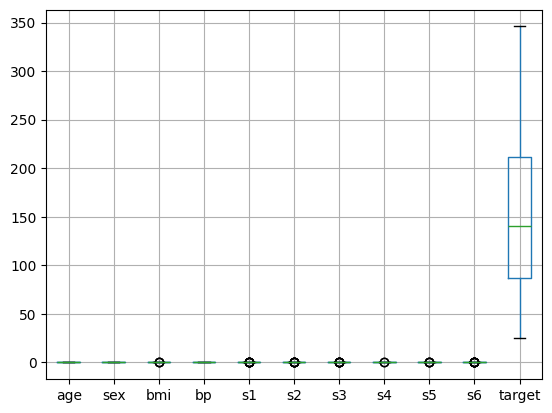

In [7]:
import matplotlib.pyplot as plt
diabetes_df.boxplot()
plt.show()

In [8]:
skewness =diabetes_df.skew()
# Filter columns where skewness is less than -0.5 or greater than 0.5
columns_with_extreme_skew = skewness[(skewness < -0.5) | (skewness > 0.5)].index

# Print the column names
print("columns_with_extreme_skewness are:", columns_with_extreme_skew)
skewness

columns_with_extreme_skewness are: Index(['bmi', 's3', 's4'], dtype='object')


age      -0.231382
sex       0.127385
bmi       0.598148
bp        0.290658
s1        0.378108
s2        0.436592
s3        0.799255
s4        0.735374
s5        0.291754
s6        0.207917
target    0.440563
dtype: float64

### The 'Bmi','s3' and 's4' columns have extrem skewness, This indicates presence of outliers.

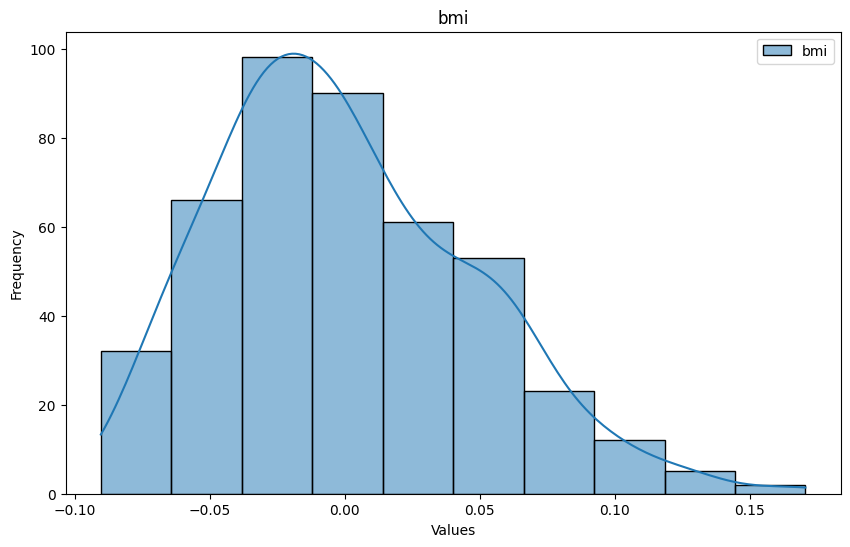

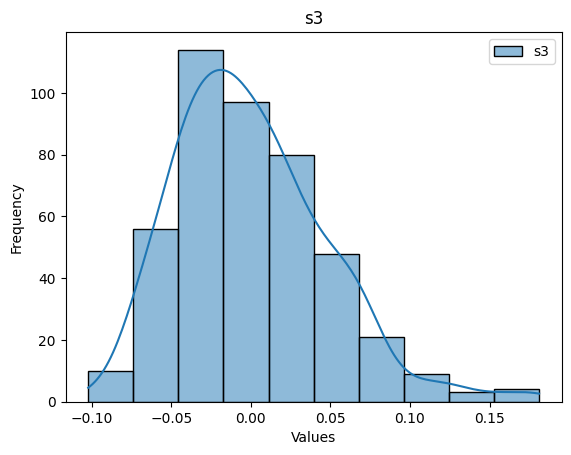

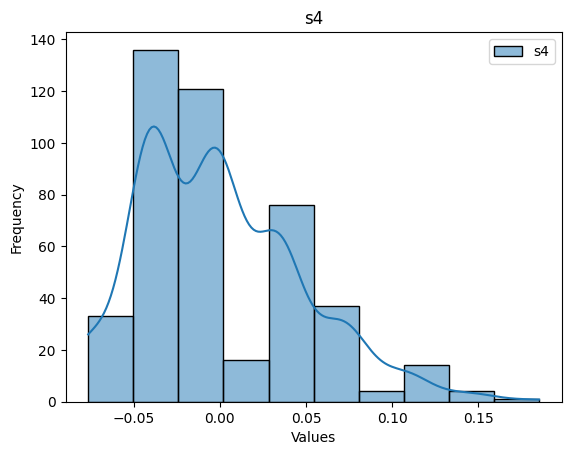

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the columns with extreme skewness
plt.figure(figsize=(10, 6))

# Iterate over the columns with extreme skewness
for col in columns_with_extreme_skew:
    sns.histplot(diabetes_df[col], bins=10, alpha=0.5, label=col,kde=True)
    plt.title( col)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


bmi - Lower Bound: -0.13244469328909578, Upper Bound: 0.1294636406639386


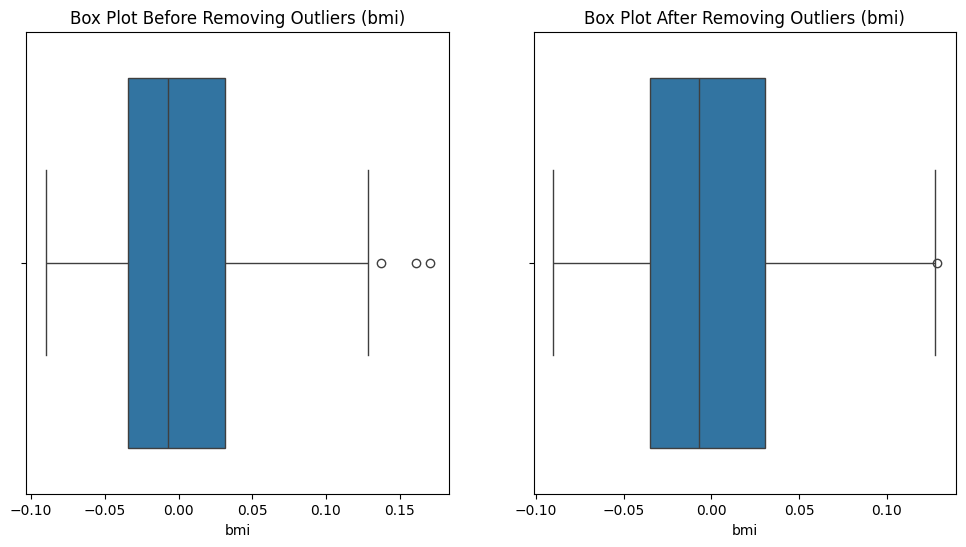

s3 - Lower Bound: -0.1262376962439811, Upper Bound: 0.12411367443393093


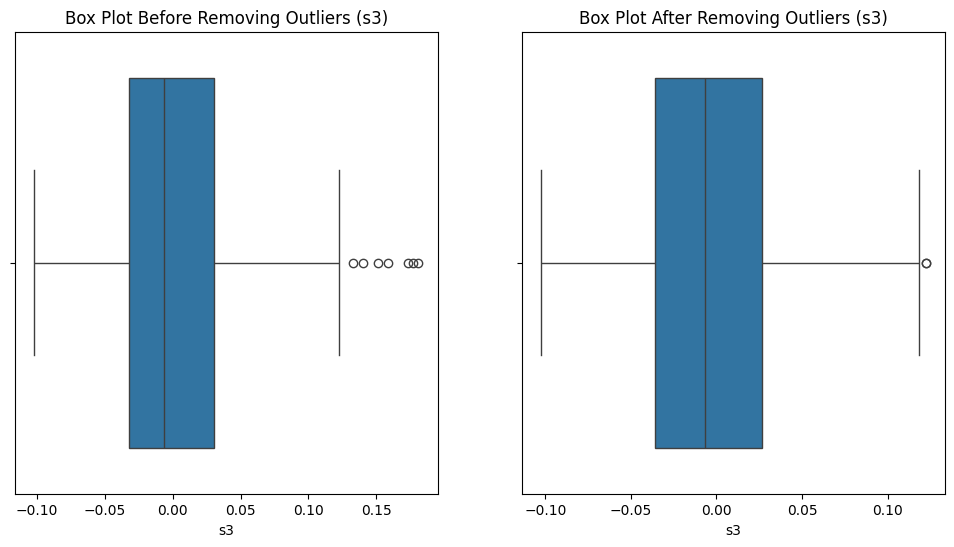

s4 - Lower Bound: -0.15019674550182333, Upper Bound: 0.14501222150545676


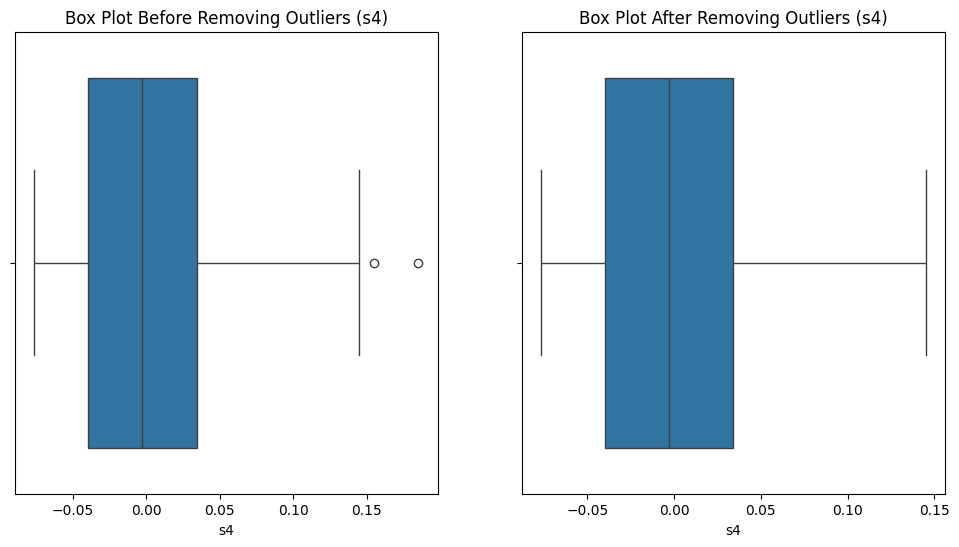

In [10]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

# Function to remove outliers
def remove_outliers(df, column):
    lower_bound, upper_bound = detect_outliers_iqr(df, column)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns with extreme skewness
columns_with_extreme_skewness = ['bmi', 's3', 's4']

# Process each column for outlier detection and removal
for column in columns_with_extreme_skewness:
    # Detect outliers
    lower_bound, upper_bound = detect_outliers_iqr(diabetes_df, column)
    print(f"{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    # Remove outliers
    diabetes_df_no_outliers = remove_outliers(diabetes_df, column)
    
    # Visualize before and after removing outliers
    plt.figure(figsize=(12, 6))
    
    # Box plot before removing outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=diabetes_df[column])
    plt.title(f'Box Plot Before Removing Outliers ({column})')
    
    # Box plot after removing outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=diabetes_df_no_outliers[column])
    plt.title(f'Box Plot After Removing Outliers ({column})')
    
    plt.show()

    # Update diabetes_df to the new DataFrame without outliers for further processing
    diabetes_df = diabetes_df_no_outliers.copy()

In [11]:
diabetes_df.shape

(430, 11)

In [12]:
diabetes_df.skew()

age      -0.230189
sex       0.121576
bmi       0.458693
bp        0.283629
s1        0.361131
s2        0.314090
s3        0.417390
s4        0.652379
s5        0.278335
s6        0.217517
target    0.428594
dtype: float64

### After outler detection the skewness of almost all featuers are between -0.5 and +0.5 . The skewness of s4 column has severly decresed.Thus further treatment of skewness not required.

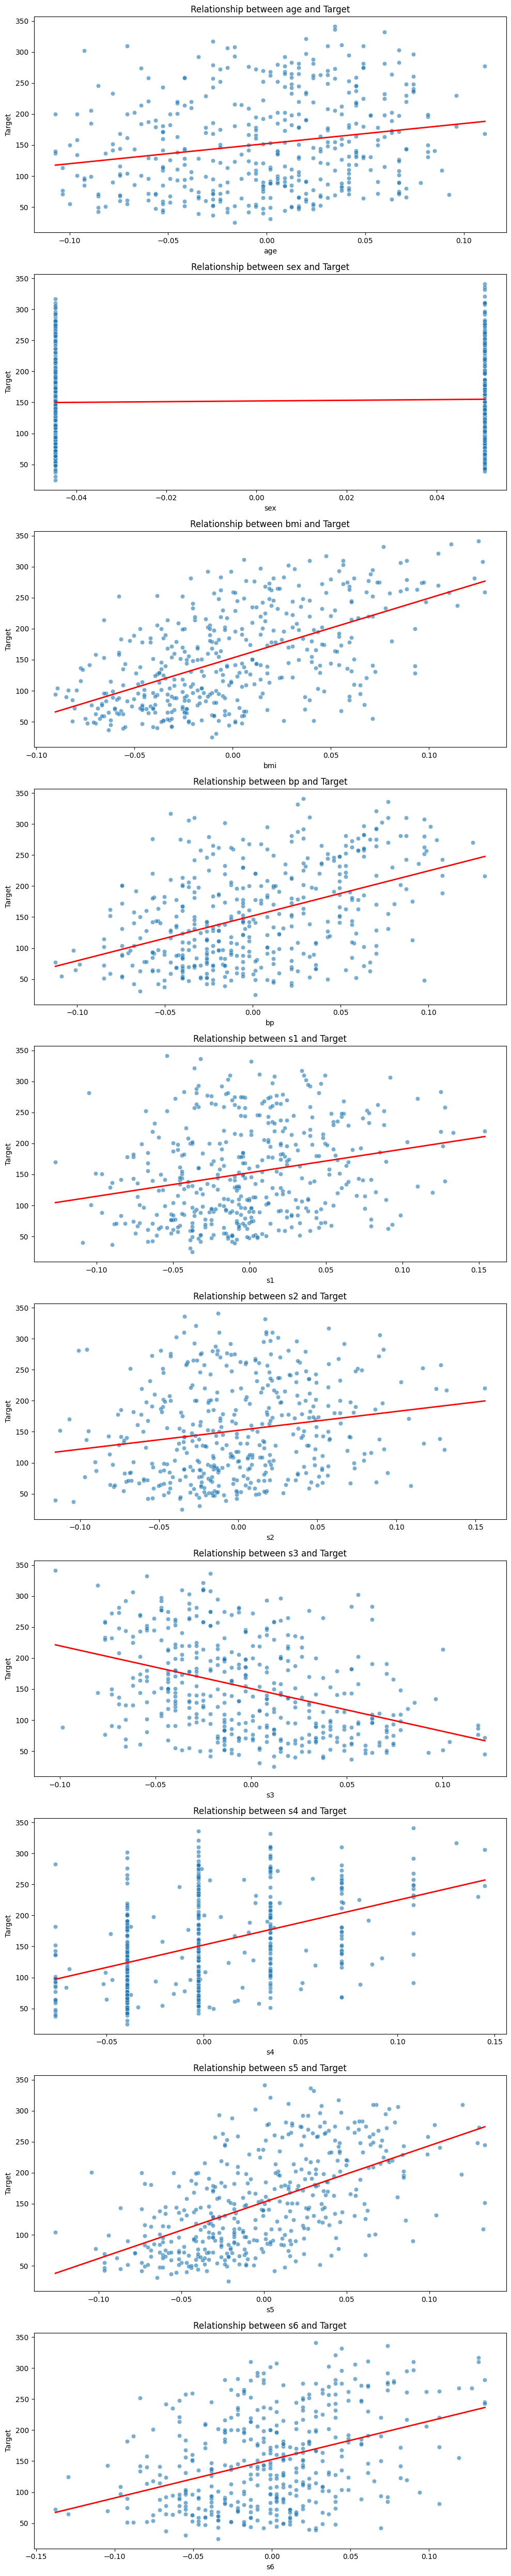

In [13]:
#Visualize the relationships between features and the target variable.
import seaborn as sns
# Set up the figure for scatter plots
num_features = diabetes_df.shape[1] - 1  # Exclude target variable for plotting
fig, axs = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# Plot each feature against the target variable
for i, column in enumerate(diabetes_df.columns[:-1]):  # Exclude the target column
    sns.scatterplot(data=diabetes_df, x=column, y=diabetes_df['target'], ax=axs[i], alpha=0.6)
    
    # Calculate and plot line of best fit
    slope, intercept = np.polyfit(diabetes_df[column], diabetes_df['target'], 1)
    x = np.linspace(diabetes_df[column].min(), diabetes_df[column].max(), 100)
    y = slope * x + intercept
    
    axs[i].plot(x, y, color='red', linewidth=2)  # Line of best fit
    axs[i].set_title(f'Relationship between {column} and Target')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Target')

plt.tight_layout()
plt.show()

In [14]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diabetes_df.drop('target', axis=1))
y = diabetes_df['target']

## 3.Building the ANN Model 

In [15]:
from keras.models import Sequential
from keras.layers import Dense

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\diluk\anaconda3\envs\myvenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.Training the ANN Model 

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 29309.5449
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29006.4434
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25896.6934
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21463.0527
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19044.1855 
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14199.7539 
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6821.8857
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5121.1191
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4371.1006
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3925.9036
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3765.6284
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3593.7825
Epoch 13/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3342.3494
Epoch 14/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3954.4824
Epoch 15/100
35/35 ━━

## Evaluating the Model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Mean Squared Error: 2811.8227273010107
R² Score: 0.40150720556952524


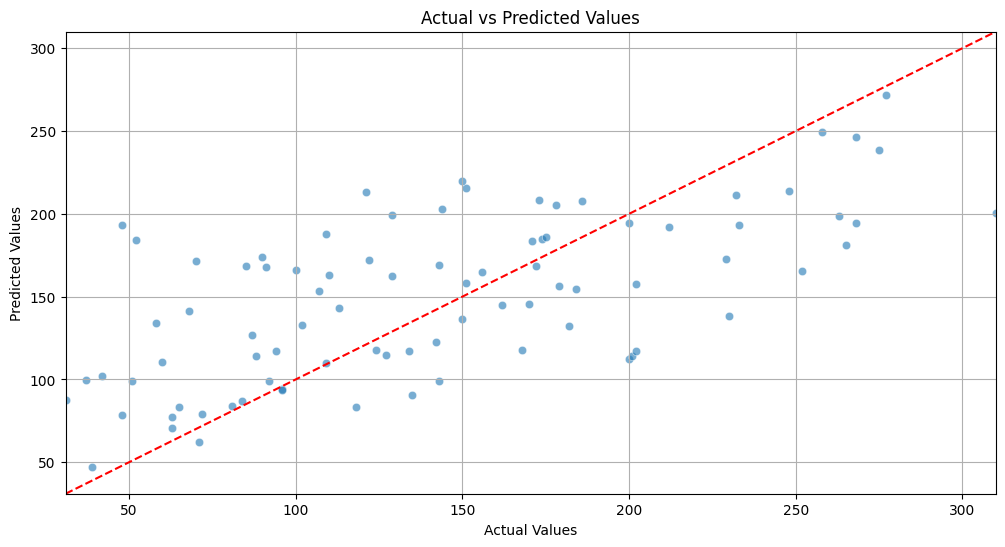

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined from your model predictions
# Convert to numpy arrays if they are not already
y_test = np.array(y_test).flatten()  # Ensure it's 1D
y_pred = np.array(y_pred).flatten()  # Ensure it's 1D

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Add a line for perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Set the title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

# Show the plot
plt.grid()
plt.show()


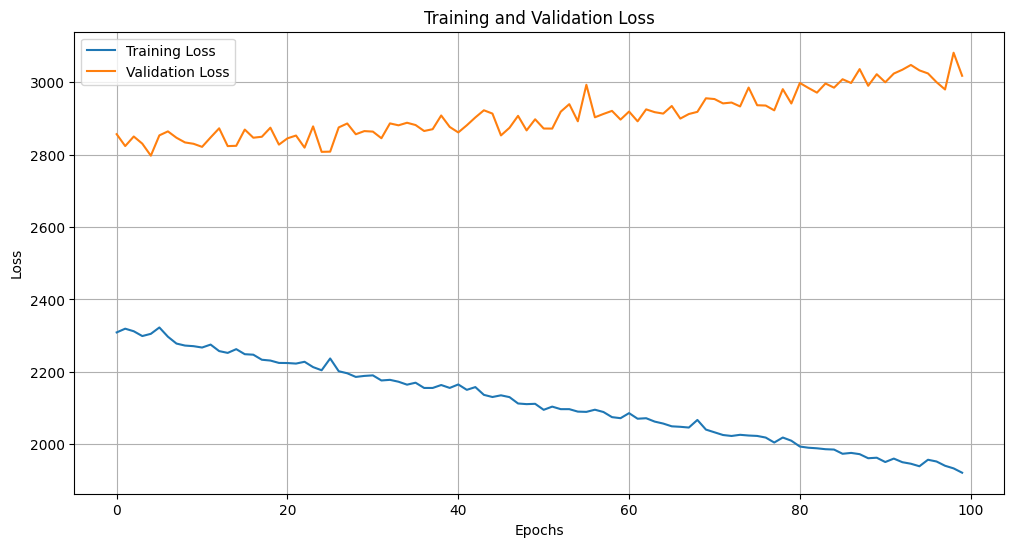

In [19]:
import matplotlib.pyplot as plt

# Assuming you have already defined your model and trained it
# Initialize lists to store loss values
train_losses = []
val_losses = []

# Train the model and capture loss values
for epoch in range(100):  # Adjust the number of epochs as needed
    # Train on training data
    history = model.fit(X_train, y_train, epochs=1, batch_size=10, verbose=0)

    # Append training loss
    train_losses.append(history.history['loss'][0])

    # Evaluate on validation data
    val_loss = model.evaluate(X_test, y_test, verbose=0)
    val_losses.append(val_loss)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## 6.Improving the Model

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

# Build the improved ANN model with an Input layer
model_improved = Sequential()
model_improved.add(Input(shape=(X_scaled.shape[1],)))  # Input layer
model_improved.add(Dense(128, activation='relu'))
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1))  # Output layer for regression

# Compile the model
model_improved.compile(optimizer='adam', loss='mean_squared_error')

# Train improved model with validation data
history = model_improved.fit(X_train, y_train, 
                              epochs=100, 
                              batch_size=10, 
                              validation_data=(X_test, y_test), 
                              verbose=0)

# Evaluate improved model
y_pred_improved = model_improved.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f'Improved Mean Squared Error: {mse_improved}')
print(f'Improved R² Score: {r2_improved}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Improved Mean Squared Error: 2569.984187720719
Improved R² Score: 0.5149281655739147


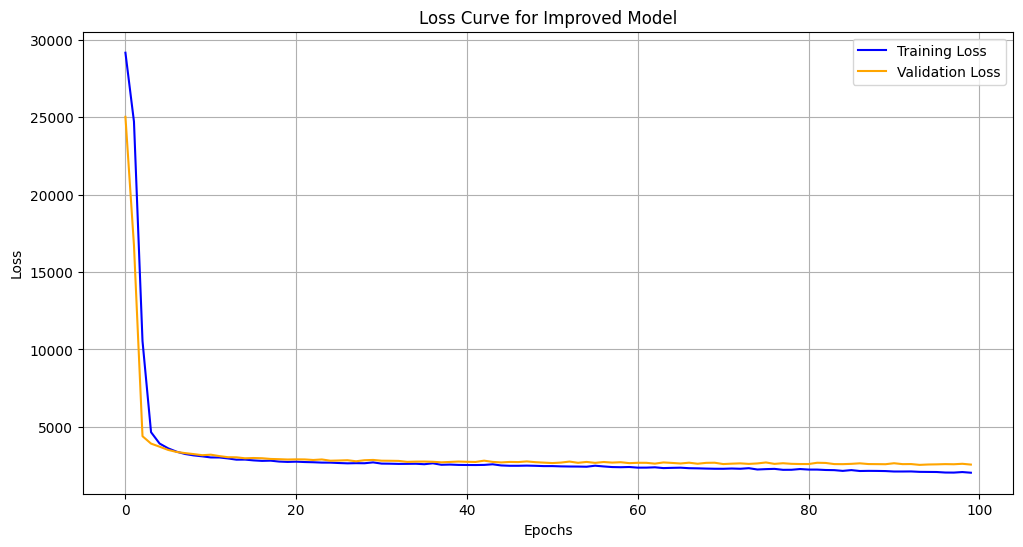

In [25]:

# Plotting the loss curves for training and validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve for Improved Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


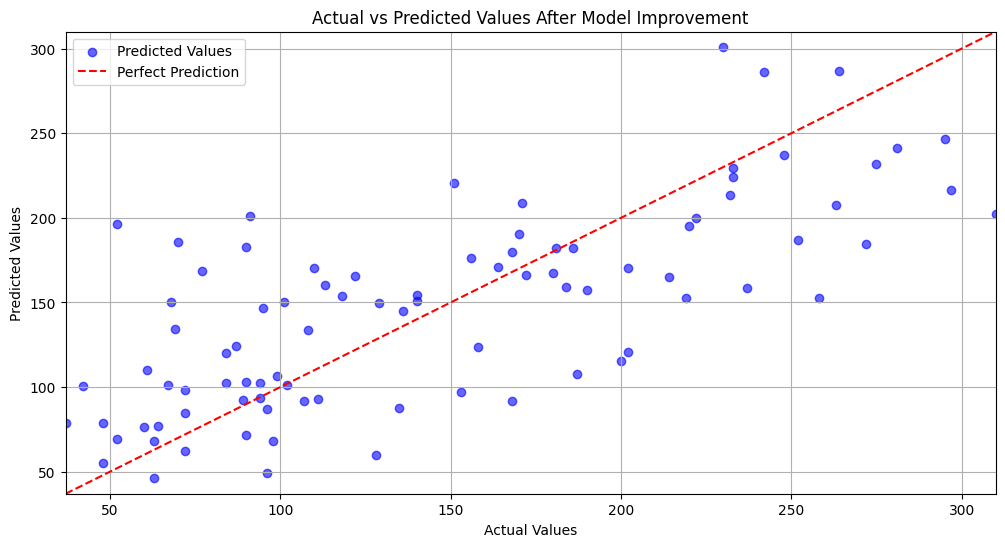

In [26]:

# Create a combined scatter and line plot for actual vs predicted values
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred_improved, color='blue', label='Predicted Values', alpha=0.6)

# Add a line for perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')


# Set the title and labels
plt.title('Actual vs Predicted Values After Model Improvement')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

# Add legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()
